<a href="https://colab.research.google.com/github/ArminD93/cost_livning_dataset/blob/dev/Cost_living_apartament.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import zeszytu z ustawieniami:
%cd '/content/drive/My Drive/ColabNotebooks/Cost_living/'
%run Cost_living_configuration.ipynb

/content/drive/My Drive/ColabNotebooks/Cost_living
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Columns: 162 entries, Unnamed: 0 to Quito, Ecuador
dtypes: float64(160), object(2)
memory usage: 64.1 KB


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [2]:
# Utworzenie obiektu data frame, gdzie będą przechowywane infomracje o apartamentach:
apartament = df_transponed['apartament']
apartament.head()

Unnamed: 0                                        1Bed_Apartment_CityCentre  ...  Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Region          Country            City                                      ...                                                              
Caribbean       Dominican Republic Santo Domingo                     381.17  ...                                              53.67           
Central America Costa Rica         San Jose                          461.72  ...                                              65.12           
                Mexico             Guadalajara                       309.42  ...                                              22.64           
                                   Mexico City                       550.18  ...                                              30.09           
                                   Monterrey                         342.55  ...                                              49.81           

[5 rows x 7 columns]

In [3]:
apartament.index

MultiIndex([(      'Caribbean', 'Dominican Republic', 'Santo Domingo'),
            ('Central America',         'Costa Rica',      'San Jose'),
            ('Central America',             'Mexico',   'Guadalajara'),
            ('Central America',             'Mexico',   'Mexico City'),
            ('Central America',             'Mexico',     'Monterrey'),
            ('Central America',             'Panama',   'Panama City'),
            (   'Central Asia',         'Kazakhstan',        'Almaty'),
            ( 'Eastern Africa',              'Kenya',       'Nairobi'),
            (   'Eastern Asia',              'China',       'Beijing'),
            (   'Eastern Asia',              'China',      'Shanghai'),
            ...
            ( 'Western Europe',             'France',         'Paris'),
            ( 'Western Europe',            'Germany',        'Berlin'),
            ( 'Western Europe',            'Germany',     'Frankfurt'),
            ( 'Western Europe',            'Germ

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, '1Bed apartment in city centre')

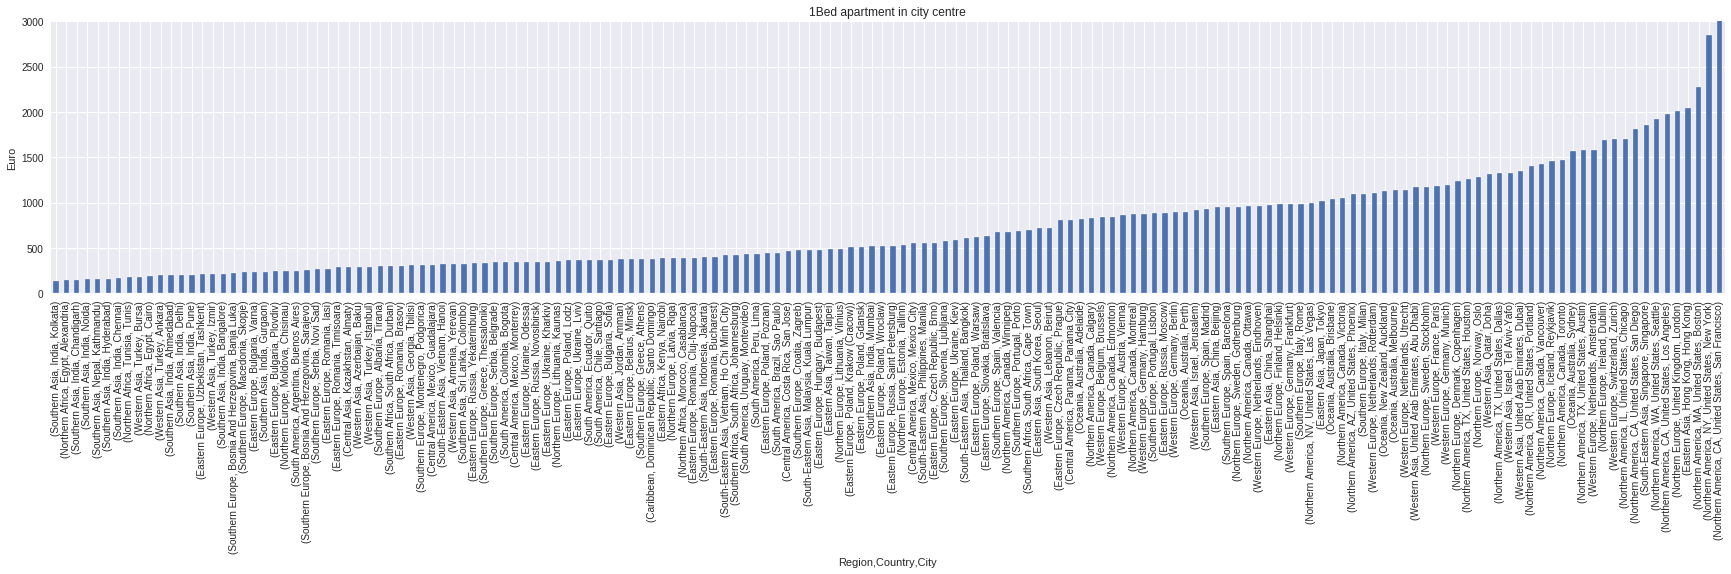

In [4]:
# Posortowanie wartości według kolumny Bed_Apartment_CityCentre:
apartament.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

# Ceny mieszkań, 1 pokojowe, w różnych miastach na Świecie:
plt.style.use('seaborn')
apartament['1Bed_Apartment_CityCentre'].plot(figsize=(30,5), ylim=[0,3000], kind ='bar')
plt.ylabel('Euro')
plt.title('1Bed apartment in city centre')

In [0]:
apartament.reset_index(inplace=True)
apartament.set_index(['Country'],inplace=True)

Text(0.5, 1.0, '1Bed apartment in city centre')

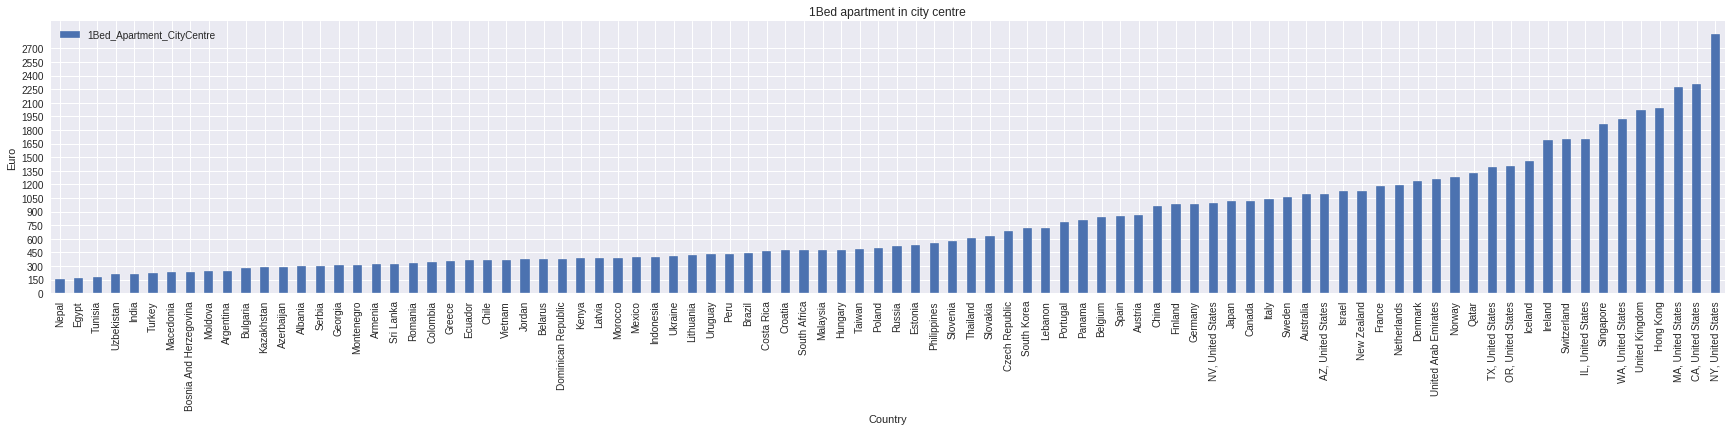

In [6]:
apartament_country_groups = apartament.groupby(by='Country')

Country_1Bed_cityCentre_mean = apartament_country_groups.agg({'1Bed_Apartment_CityCentre' : 'mean'})

# Posortowanie wartości:
Country_1Bed_cityCentre_mean.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

plt.style.use('seaborn')

Country_1Bed_cityCentre_mean.plot(figsize=(30,5), kind ='bar')
plt.yticks(np.arange(0, 2750, step=150))
plt.ylabel('Euro')
plt.title('1Bed apartment in city centre')


In [0]:
apartament.reset_index(inplace=True)
apartament.set_index(['Region'],inplace=True)

Text(0.5, 1.0, '1Bed apartment in city centre')

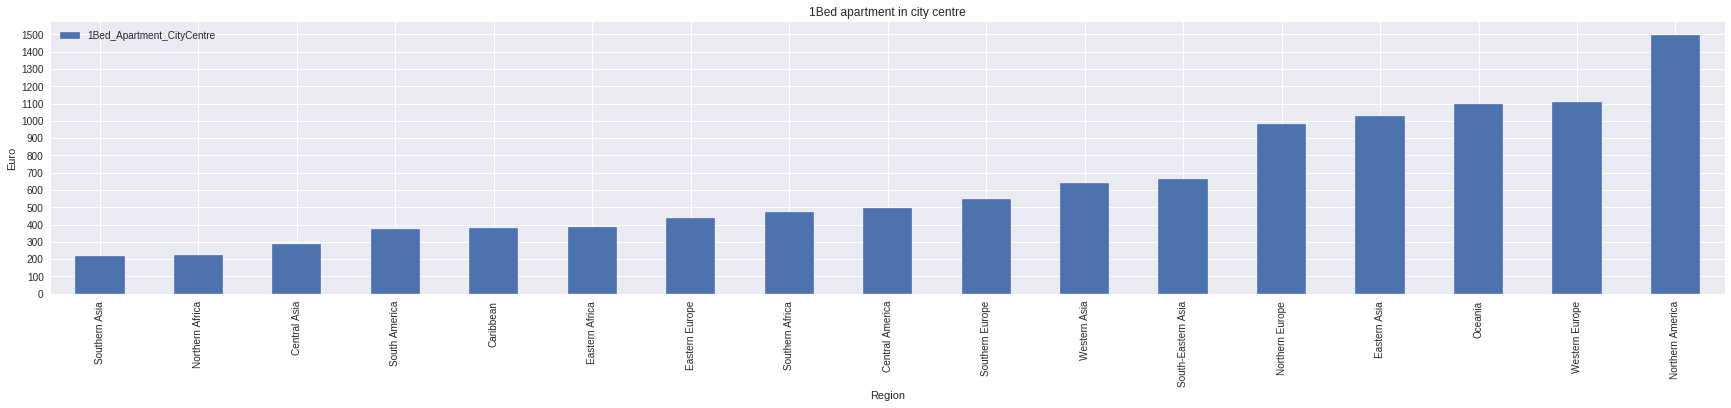

In [8]:
apartament_country_groups = apartament.groupby(by='Region')
Country_1Bed_cityCentre_mean = apartament_country_groups.agg({'1Bed_Apartment_CityCentre' : 'mean'})

# Posortowanie wartości:
Country_1Bed_cityCentre_mean.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

plt.style.use('seaborn')

Country_1Bed_cityCentre_mean.plot(figsize=(30,5), kind ='bar')
plt.yticks(np.arange(0, 1550, step=100))
plt.ylabel('Euro')
plt.title('1Bed apartment in city centre')

In [9]:
apartament.index

Index(['Southern Asia', 'Northern Africa', 'Southern Asia', 'Southern Asia',
       'Southern Asia', 'Southern Asia', 'Southern Asia', 'Northern Africa',
       'Western Asia', 'Northern Africa',
       ...
       'Northern America', 'Northern America', 'South-Eastern Asia',
       'Northern America', 'Northern America', 'Northern Europe',
       'Eastern Asia', 'Northern America', 'Northern America',
       'Northern America'],
      dtype='object', name='Region', length=160)

In [10]:
apartament_country_groups = apartament.groupby(by='Region')
Country_1Bed_cityCentre_mean = apartament_country_groups.agg({'1Bed_Apartment_CityCentre' : 'mean'})

# Posortowanie wartości:
Country_1Bed_cityCentre_mean.sort_values(by='1Bed_Apartment_CityCentre', inplace=True)

Country_1Bed_cityCentre_mean.reset_index(inplace=True)

Country_1Bed_cityCentre_mean.head()

,Region,1Bed_Apartment_CityCentre
0,Southern Asia,216.570
1,Northern Africa,222.495
2,Central Asia,288.220
3,South America,376.680
4,Caribbean,381.170


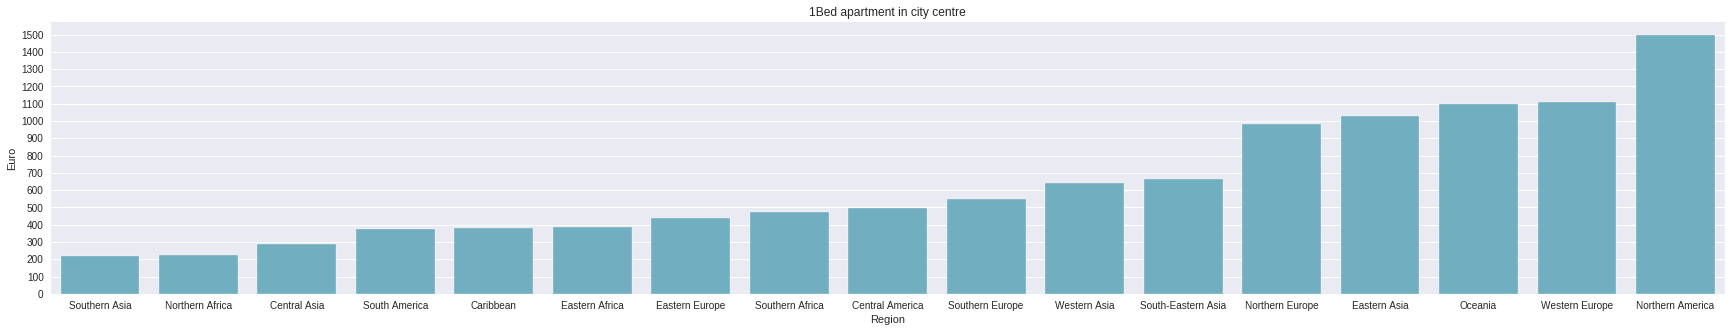

In [11]:
x_data= 'Region'
y_data= '1Bed_Apartment_CityCentre'

plt.figure(figsize=(30,5))
plt.yticks(np.arange(0, 1550, step=100))

ax = sns.barplot(
    data=Country_1Bed_cityCentre_mean,
    x=x_data, 
    y=y_data,
    color='c'  
    )
ax.set(xlabel='Region',
       ylabel='Euro',
       title='1Bed apartment in city centre' )

plt.show()

In [12]:
apartament.reset_index(inplace=True)

apartament.set_index(['Region', 'Country','City'],inplace=True)
apartament.head()

Unnamed: 0                          1Bed_Apartment_CityCentre  ...  Basic_ElectricityHeatingCoolingWaterGarbage_for85m2Apartment
Region          Country City                                   ...                                                              
Southern Asia   India   Kolkata                        138.31  ...                                              29.47           
Northern Africa Egypt   Alexandria                     142.04  ...                                              18.56           
Southern Asia   India   Chandigarh                     149.06  ...                                              60.44           
                        Noida                          153.28  ...                                              61.65           
                Nepal   Kathmandu                      155.63  ...                                              24.92           

[5 rows x 7 columns]